## Let's look at the second tour of elections

Note that I will copy most of the code and plots from the experiment in the first tour <br>
I will add new plots at the end

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

presence = pd.read_csv('presence_2025-05-18_21-00.csv')
population = pd.read_csv('estat_demo_pjangroup$defaultview_filtered_en.csv')

In [2]:
age_groups = ["Barbati 18-24","Barbati 25-34","Barbati 35-44","Barbati 45-64","Barbati 65+","Femei 18-24","Femei 25-34","Femei 35-44","Femei 45-64","Femei 65+"]

age_group_count = presence[age_groups].sum()
age_group_count

Barbati 18-24     479183
Barbati 25-34     772502
Barbati 35-44    1147228
Barbati 45-64    2247769
Barbati 65+      1028398
Femei 18-24       482312
Femei 25-34       783359
Femei 35-44      1113527
Femei 45-64      2276849
Femei 65+        1310739
dtype: int64

In [3]:
def map_age_range_to_group(age_range):
    if "Less than" in age_range or " 0 to" in age_range or " 5 to" in age_range or "10 to" in age_range:
        return None  # Under 18, not included
    elif "20 to 24" in age_range or "15 to 19" in age_range:
        return "18-24"
    elif "25 to 29" in age_range or "30 to 34" in age_range:
        return "25-34"
    elif "35 to 39" in age_range or "40 to 44" in age_range:
        return "35-44"
    elif "45 to 49" in age_range or "50 to 54" in age_range or "55 to 59" in age_range or "60 to 64" in age_range:
        return "45-64"
    elif "65" in age_range or "70" in age_range or "75" in age_range or "80" in age_range or "85" in age_range or "90" in age_range:
        return "65+"
    else:
        return None

In [4]:
# we'll take 2024 since it's the most recent year we have in the dataset
# and ['geo'] == 'Romania' since we re only looking for the population in Romania

population_romania = population[(population['geo'] == 'Romania') & (population['TIME_PERIOD'] == 2024)]
population_romania['Mapped Group'] = population_romania['age'].apply(map_age_range_to_group)
grouped_population = population_romania.groupby(['Mapped Group', 'sex'])['OBS_VALUE'].sum()

# these are minors
grouped_population.loc[('18-24', 'Females')] -= 300_000
grouped_population.loc[('18-24', 'Males')] -= 300_000
grouped_population.loc[('18-24', 'Total')] -= 600_000
print(grouped_population)

Mapped Group  sex    
18-24         Females     709772.0
              Males       771649.0
              Total      1481421.0
25-34         Females    1010859.0
              Males      1081235.0
              Total      2092094.0
35-44         Females    1292161.0
              Males      1376820.0
              Total      2668981.0
45-64         Females    2712102.0
              Males      2662808.0
              Total      5374910.0
65+           Females    3823203.0
              Males      2328425.0
              Total      6151628.0
Name: OBS_VALUE, dtype: float64


C:\Users\Tudor\AppData\Local\Temp\ipykernel_2056\2207976281.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_romania['Mapped Group'] = population_romania['age'].apply(map_age_range_to_group)


In [5]:
def map_sex(age_text):
    if 'Barbati' in age_text:
        return 'Males'
    elif 'Femei' in age_text:
        return 'Females'
    return None

In [6]:
# we re adding the sex columns

age_group_count_df = age_group_count.reset_index().rename(columns={'index':'age', 0:'OBS_VALUE'})
age_group_count_df['sex'] = age_group_count_df['age'].apply(map_sex)
age_group_count_df

,age,OBS_VALUE,sex
0,Barbati 18-24,479183,Males
1,Barbati 25-34,772502,Males
2,Barbati 35-44,1147228,Males
3,Barbati 45-64,2247769,Males
4,Barbati 65+,1028398,Males
5,Femei 18-24,482312,Females
6,Femei 25-34,783359,Females
7,Femei 35-44,1113527,Females
8,Femei 45-64,2276849,Females
9,Femei 65+,1310739,Females


In [7]:
def map_age(age_text):
    return age_text.replace('Barbati ', '').replace('Femei ', '')

In [8]:
# let's fix the age column now:
age_group_count_df['age'] = age_group_count_df['age'].apply(map_age)
age_group_count_df

,age,OBS_VALUE,sex
0,18-24,479183,Males
1,25-34,772502,Males
2,35-44,1147228,Males
3,45-64,2247769,Males
4,65+,1028398,Males
5,18-24,482312,Females
6,25-34,783359,Females
7,35-44,1113527,Females
8,45-64,2276849,Females
9,65+,1310739,Females


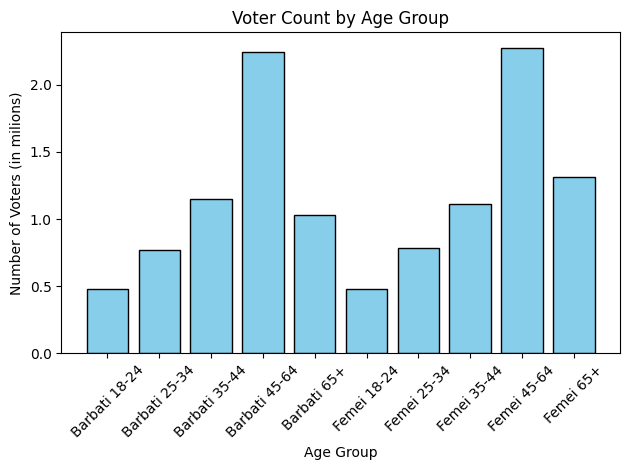

In [9]:
import matplotlib.pyplot as plt

# this will be the basic plot with the number of votes

plt.bar(x=age_group_count.index, height=age_group_count.values / 1000_000, color='skyblue', edgecolor='black')
plt.title('Voter Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Voters (in milions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

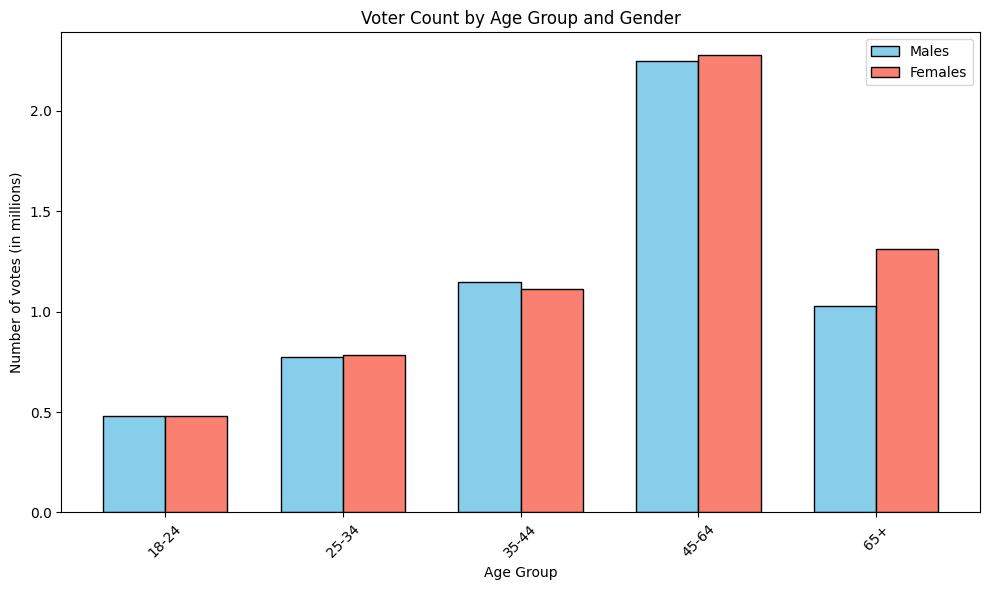

In [10]:
# now with the data frame and we ll also color the ganders

import matplotlib.pyplot as plt

df_vot = age_group_count_df.reset_index()
votes_pivot = df_vot.pivot(index='age', columns='sex', values='OBS_VALUE') / 1_000_000  # in thousands

age_groups = votes_pivot.index
x = np.arange(len(age_groups))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, votes_pivot['Males'], width, label='Males', color='skyblue', edgecolor='black')
ax.bar(x + width/2, votes_pivot['Females'], width, label='Females', color='salmon', edgecolor='black')

ax.set_title('Voter Count by Age Group and Gender')
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of votes (in millions)')
ax.set_xticks(x)
ax.set_xticklabels(age_groups, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()


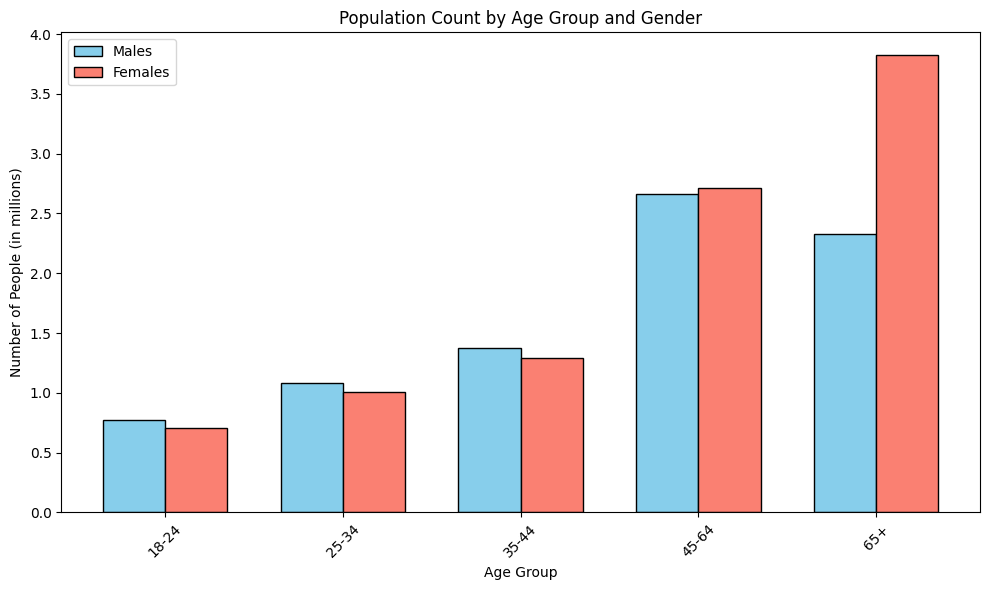

In [11]:
import matplotlib.pyplot as plt

# here we'll plot the population for age groups

df_pop = grouped_population.reset_index()
pivot_df = df_pop.pivot(index='Mapped Group', columns='sex', values='OBS_VALUE') / 1_000_000  # in millions

age_groups = pivot_df.index
x = np.arange(len(age_groups))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, pivot_df['Males'], width, label='Males', color='skyblue', edgecolor='black')
ax.bar(x + width/2, pivot_df['Females'], width, label='Females', color='salmon', edgecolor='black')

ax.set_title('Population Count by Age Group and Gender')
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of People (in millions)')
ax.set_xticks(x)
ax.set_xticklabels(age_groups, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()


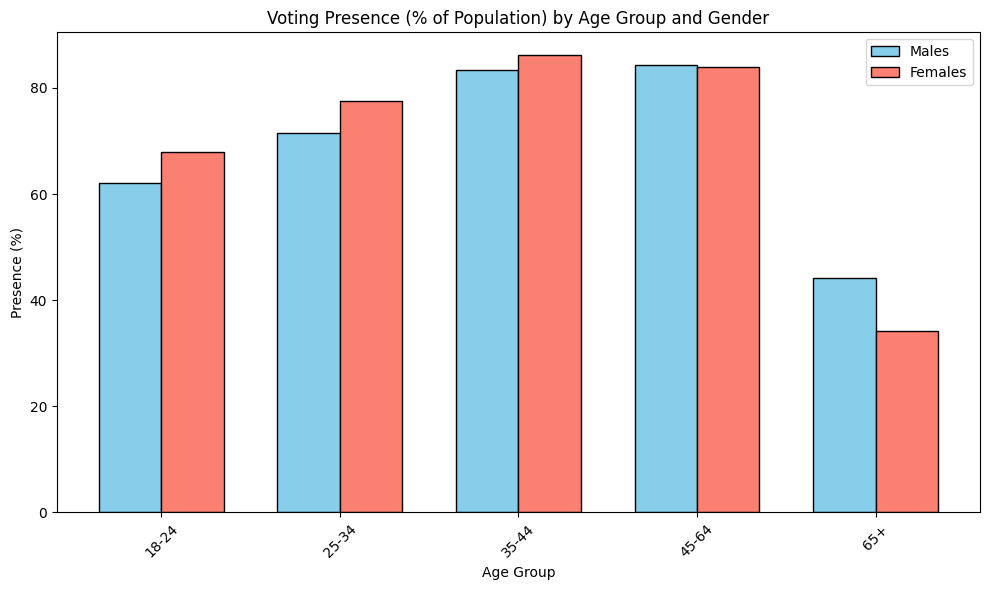

In [12]:
votes_pivot = df_vot.pivot(index='age', columns='sex', values='OBS_VALUE')
pivot_df = df_pop.pivot(index='Mapped Group', columns='sex', values='OBS_VALUE')

percentage_df = (votes_pivot / pivot_df) * 100
x = np.arange(len(percentage_df))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, percentage_df['Males'], width, label='Males', color='skyblue', edgecolor='black')
ax.bar(x + width/2, percentage_df['Females'], width, label='Females', color='salmon', edgecolor='black')

ax.set_title('Voting Presence (% of Population) by Age Group and Gender')
ax.set_xlabel('Age Group')
ax.set_ylabel('Presence (%)')
ax.set_xticks(x)
ax.set_xticklabels(age_groups, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()


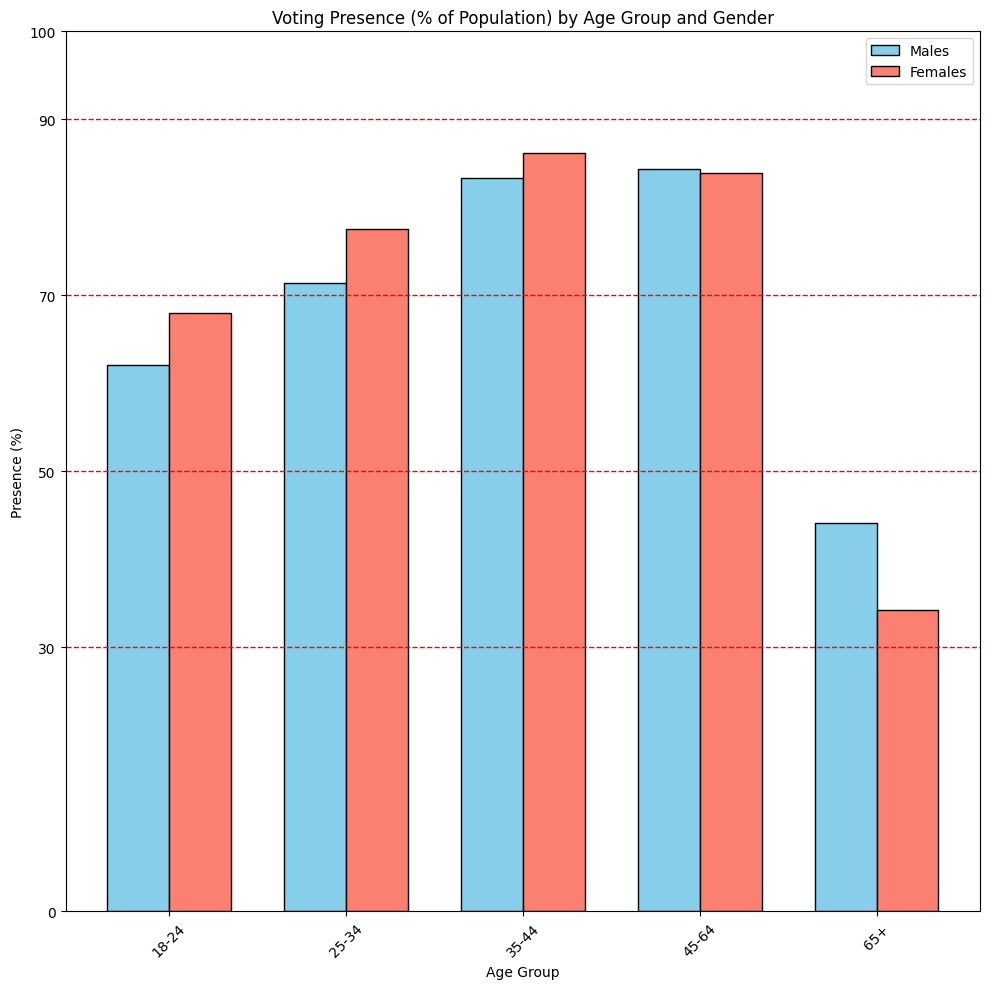

In [23]:
# same plot but with max y value 100
votes_pivot = df_vot.pivot(index='age', columns='sex', values='OBS_VALUE')
pivot_df = df_pop.pivot(index='Mapped Group', columns='sex', values='OBS_VALUE')

percentage_df = (votes_pivot / pivot_df) * 100
x = np.arange(len(percentage_df))

fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(x - width/2, percentage_df['Males'], width, label='Males', color='skyblue', edgecolor='black')
ax.bar(x + width/2, percentage_df['Females'], width, label='Females', color='salmon', edgecolor='black')

ax.axhline(90, color='red', linestyle='--', linewidth=1)
ax.axhline(70, color='red', linestyle='--', linewidth=1)
ax.axhline(50, color='red', linestyle='--', linewidth=1)
ax.axhline(30, color='red', linestyle='--', linewidth=1)

ax.set_title('Voting Presence (% of Population) by Age Group and Gender')
ax.set_xlabel('Age Group')
ax.set_ylabel('Presence (%)')
ax.set_xticks(x)
ax.set_xticklabels(age_groups, rotation=45)
ax.set_yticks([0, 30, 50, 70, 90, 100])
ax.legend()
ax.set_ylim(0, 100)
plt.tight_layout()
plt.show()

In [21]:
percentage_df['Total'] = (percentage_df['Males'] + percentage_df['Females']) / 2
percentage_df

sex,Females,Males,Total
age,,,
18-24,67.953089,62.098571,65.025830
25-34,77.494388,71.446263,74.470326
35-44,86.175562,83.324472,84.750017
45-64,83.951452,84.413484,84.182468
65+,34.283793,44.167109,39.225451


Okay next i want to plot one near the other the procenteges from the first tour and the ones from the second

In [34]:
presence_T1 = pd.read_csv('presence_2025-05-04_21-00.csv')

age_groups_1 = ["Barbati 18-24","Barbati 25-34","Barbati 35-44","Barbati 45-64","Barbati 65+","Femei 18-24","Femei 25-34","Femei 35-44","Femei 45-64","Femei 65+"]
age_group_count_1 = presence_T1[age_groups_1].sum()



age_group_count_1_df = age_group_count_1.reset_index().rename(columns={'index':'age', 0:'OBS_VALUE'})
age_group_count_1_df['sex'] = age_group_count_1_df['age'].apply(map_sex)

age_group_count_1_df['age'] = age_group_count_1_df['age'].apply(map_age)
age_group_count_1_df

,age,OBS_VALUE,sex
0,18-24,367862,Males
1,25-34,603845,Males
2,35-44,909214,Males
3,45-64,1870019,Males
4,65+,952283,Males
5,18-24,373845,Females
6,25-34,611195,Females
7,35-44,869933,Females
8,45-64,1858511,Females
9,65+,1155033,Females


In [37]:
df_vot_T1 = age_group_count_1_df.reset_index()

votes_pivot_1 = df_vot_T1.pivot(index='age', columns='sex', values='OBS_VALUE')
pivot_df_1 = df_pop.pivot(index='Mapped Group', columns='sex', values='OBS_VALUE')

percentage_1_df = (votes_pivot_1 / pivot_df_1) * 100

percentage_1_df['Total'] = (percentage_1_df['Males'] + percentage_1_df['Females']) / 2
percentage_1_df

sex,Females,Males,Total
age,,,
18-24,52.671139,47.672193,50.171666
25-34,60.462933,55.847711,58.155322
35-44,67.323886,66.037245,66.680566
45-64,68.526589,70.227331,69.376960
65+,30.211134,40.898161,35.554648


Now let's plot them

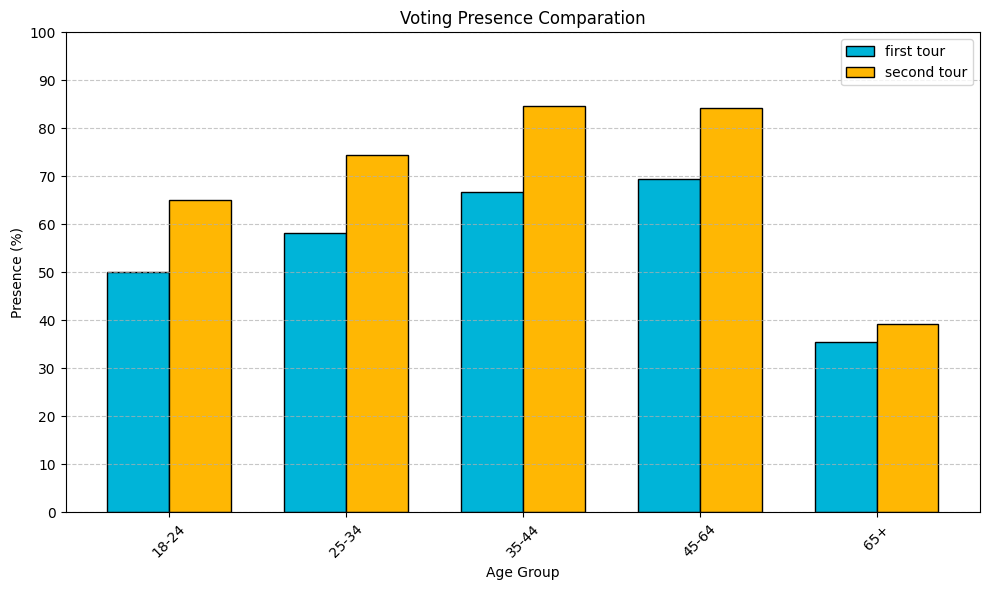

In [53]:
x = np.arange(len(percentage_df))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, percentage_1_df['Total'], width, label='first tour', color='#00b4d8', edgecolor='black')
ax.bar(x + width/2, percentage_df['Total'], width, label='second tour', color='#ffb703', edgecolor='black')

ax.set_title('Voting Presence Comparation')
ax.set_xlabel('Age Group')
ax.set_ylabel('Presence (%)')
ax.set_xticks(x)
ax.set_xticklabels(age_groups, rotation=45)
ax.legend()
ax.set_yticks(np.arange(0, 101, 10))
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Let's take a look now only at the increase in procentages:

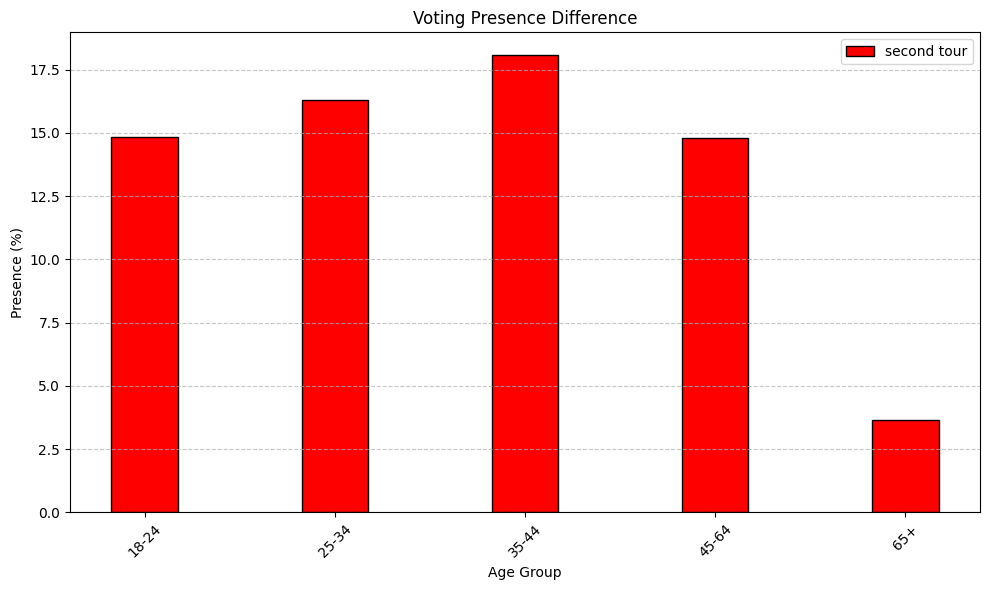

In [57]:
x = np.arange(len(percentage_df))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, percentage_df['Total'] - percentage_1_df['Total'], width, label='second tour', color='red', edgecolor='black')

ax.set_title('Voting Presence Difference')
ax.set_xlabel('Age Group')
ax.set_ylabel('Presence (%)')
ax.set_xticks(x)
ax.set_xticklabels(age_groups, rotation=45)
ax.legend()
# ax.set_yticks(np.arange(0, 101, 10))
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()